<a href="https://colab.research.google.com/github/SebastianWikt/DS4002-P1/blob/main/Scripts/Project_1_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importance of Word Choice in Education

### Group 5: Neha Channamraju (leader), Sebastian Wiktorowicz, Catherine Young

In [28]:
#ONLY NEED TO RUN THIS ONE TIME
# !pip install nltk
# !pip install spacy
# !pip install scikit-learn
# !pip install textblob
# !pip install wordcloud
# !pip install pandas numpy matplotlib seaborn

# #Install spacy extra data
# !python -m spacy download en_core_web_sm

In [29]:
# !rm -r DS4002-P1/

In [30]:
! git clone https://github.com/SebastianWikt/DS4002-P1.git

fatal: destination path 'DS4002-P1' already exists and is not an empty directory.


In [31]:
from typing_extensions import dataclass_transform
import os # to run file I/O operation
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import re
import string
import datetime
from wordcloud import WordCloud
from textblob import TextBlob
import spacy
from collections import Counter
np.random.seed(42)

# Download necessary NLTK data
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger', 'stopwords'])

# Load English tokenizer, tagger, parser, NER, and word vectors from spacy
nlp = spacy.load('en_core_web_sm')

def loadData(file):
  # The column names are adopted from the dataset page on Kaggle
  df = pd.read_csv(file)
  return df

def scatterAndLine(x, y):
    a, b = np.polyfit(x, y, 1)
    #add points to plot
    plt.scatter(x, y)
    #add line of best fit to plot
    plt.plot(x, a*x+b)
    plt.show()

def printRandP(data, column_name, compare_column, table):
  r_value, p_value = pointbiserialr(data[column_name], data[compare_column])
  new_row = pd.DataFrame({"Variable": [column_name], "r_value": [r_value], "p_value": [p_value]})
    # Create or update the table
  if table is None or table.empty:
      table = new_row
  else:
      # Concatenate the new row to the existing table
      table = pd.concat([table, new_row], ignore_index=True)

  table = table.drop_duplicates(subset=["Variable", "r_value", "p_value"], keep="first")

  # print(f"Point-biserial correlation coefficient: {r_value}")
  # print(f"P-value: {p_value}")
  return table

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
data = pd.read_csv('/content/DS4002-P1/Data/project_1_dataset.csv')
data = data.rename(columns={"Unnamed: 42": "no_of_words"})

In [33]:
# Import the TextBlob library
from textblob import TextBlob

# Define a function to calculate the polarity and subjectivity of a text
def get_sentiment(text):
	blob = TextBlob(text)
	return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to the reviews
data['polarity'], data['subjectivity'] = zip(*data['Mission Statements'].astype(str).map(get_sentiment))

# plt.scatter(data['polarity'], data['Rank in 2020'])
# plt.xlabel('Polarity')
# plt.ylabel('Rank in 2020')
# plt.show()

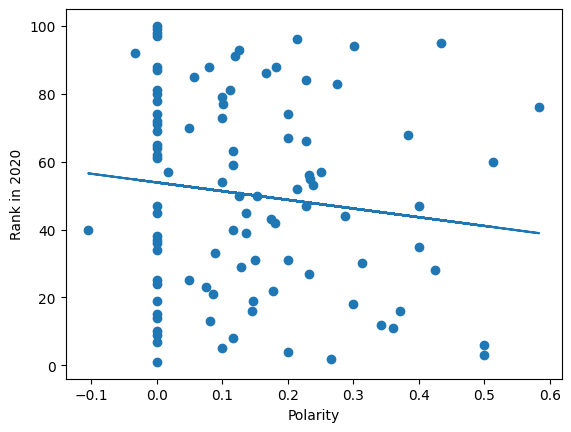

Point-biserial correlation coefficient: -0.1294930776032508
P-value: 0.1991194838683224


In [34]:
plt.xlabel('Polarity')
plt.ylabel('Rank in 2020')
scatterAndLine(data['polarity'], data['Rank in 2020'])
r_value, p_value = pointbiserialr(data['polarity'], data['Rank in 2020'])
print(f"Point-biserial correlation coefficient: {r_value}")
print(f"P-value: {p_value}")
plt.show()

<Axes: xlabel='no_of_words', ylabel='Rank in 2020'>

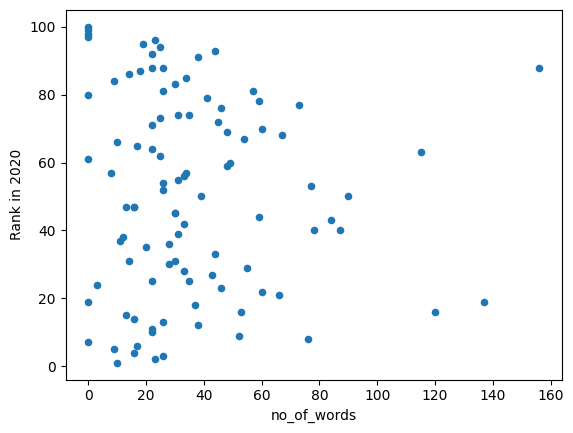

In [35]:
lrank = data[['Rank in 2020', 'no_of_words']]
lrank.plot(kind='scatter', x='no_of_words', y='Rank in 2020')

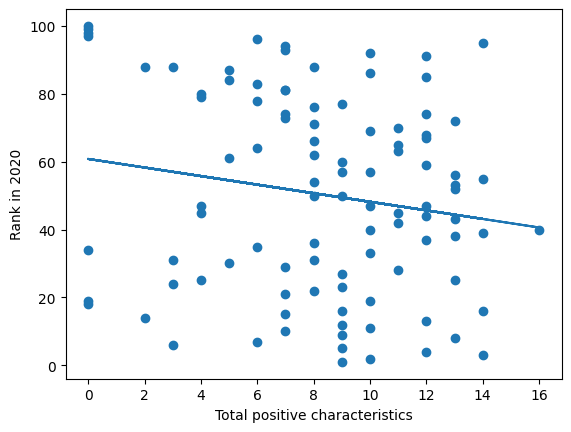

  Variable   r_value   p_value
0  Total_b -0.168729  0.093321


In [36]:
from scipy.stats import pointbiserialr
data = pd.read_csv('/content/DS4002-P1/Data/project_1_dataset.csv')
# Convert the 'Yes'/'No' column to numerical values (Yes=1, No=0)
      #  'Realistic', 'Shorter', 'Easy to communicate', 'Easy to memorize',
      #  'Easy to be explained', 'Focused', 'Unique',
data['Realistic_b'] = data['Realistic'].apply(lambda x: 1 if x == 'Y' else 0)
data['Shorter_b'] = data['Shorter'].apply(lambda x: 1 if x == 'Y' else 0)
data['Easy to communicate_b'] = data['Easy to communicate'].apply(lambda x: 1 if x == 'Y' else 0)
data['Easy to memorize_b'] = data['Easy to memorize'].apply(lambda x: 1 if x == 'Y' else 0)
data['Easy to be explained_b'] = data['Easy to be explained'].apply(lambda x: 1 if x == 'Y' else 0)
data['Focused_b'] = data['Focused'].apply(lambda x: 1 if x == 'Y' else 0)
data['Unique_b'] = data['Unique'].apply(lambda x: 1 if x == 'Y' else 0)
data['Philosophy_b'] = data['Philosophy'].apply(lambda x: 1 if x == 'Y' else 0)
data['Self-concept_b'] = data['Self-concept'].apply(lambda x: 1 if x == 'Y' else 0)
data['Concern for public image_b'] = data['Concern for public image'].apply(lambda x: 1 if x == 'Y' else 0)
data['Concern for employees_b'] = data['Concern for employees'].apply(lambda x: 1 if x == 'Y' else 0)
data['Broad in scope_b'] = data['Broad in scope'].apply(lambda x: 1 if x == 'Y' else 0)
data['Socially responsible_b'] = data['Socially responsible'].apply(lambda x: 1 if x == 'Y' else 0)
data['Environmentally responsible_b'] = data['Environmentally responsible'].apply(lambda x: 1 if x == 'Y' else 0)
data['Reconciliatory_b'] = data['Reconciliatory'].apply(lambda x: 1 if x == 'Y' else 0)
data['Enduring_b'] = data['Enduring'].apply(lambda x: 1 if x == 'Y' else 0)


data['Total_b'] = data[['Realistic_b', 'Shorter_b', 'Easy to communicate_b', 'Easy to memorize_b',
                        'Easy to be explained_b', 'Focused_b', 'Unique_b',  'Philosophy_b',
                        'Self-concept_b', 'Concern for public image_b',
                        'Concern for employees_b', 'Broad in scope_b',
                        'Socially responsible_b', 'Environmentally responsible_b',
                        'Reconciliatory_b', 'Enduring_b']].sum(axis=1)



total_table = None
total_table = printRandP(data, 'Total_b', 'Rank in 2020', total_table)
plt.xlabel('Total positive characteristics')
plt.ylabel('Rank in 2020')
scatterAndLine(data['Total_b'], data['Rank in 2020'])
print(total_table)

table = None
table = printRandP(data, 'Realistic_b', 'Rank in 2020', table)
table = printRandP(data, 'Shorter_b', 'Rank in 2020', table)
table = printRandP(data, 'Easy to communicate_b', 'Rank in 2020', table)
table = printRandP(data, 'Easy to memorize_b', 'Rank in 2020', table)
table = printRandP(data, 'Easy to be explained_b', 'Rank in 2020', table)
table = printRandP(data, 'Focused_b', 'Rank in 2020', table)
table = printRandP(data, 'Unique_b', 'Rank in 2020', table)
table = printRandP(data, 'Philosophy_b', 'Rank in 2020', table)
table = printRandP(data, 'Self-concept_b', 'Rank in 2020', table)
table = printRandP(data, 'Concern for public image_b', 'Rank in 2020', table)
table = printRandP(data, 'Concern for employees_b', 'Rank in 2020', table)
table = printRandP(data, 'Broad in scope_b', 'Rank in 2020', table)
table = printRandP(data, 'Socially responsible_b', 'Rank in 2020', table)
table = printRandP(data, 'Environmentally responsible_b', 'Rank in 2020', table)
table = printRandP(data, 'Reconciliatory_b', 'Rank in 2020', table)
table = printRandP(data, 'Enduring_b', 'Rank in 2020', table)

# print(table)


# Calculate the point-biserial correlation between the binary column and the 'Rank in 2020'
# print(data['Realistic_b'])

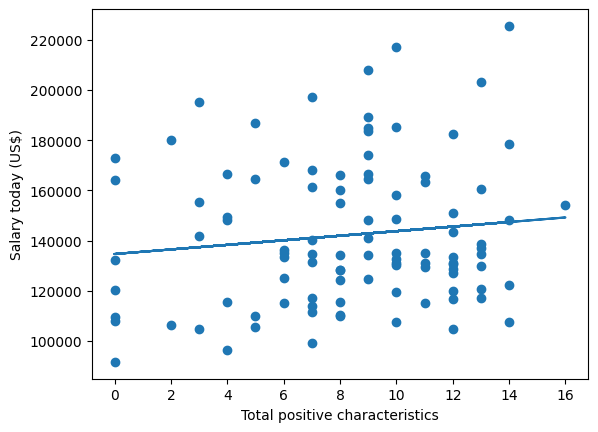

  Variable   r_value   p_value
0  Total_b  0.122231  0.225707


In [37]:
# Calculate the point-biserial correlation between the binary column and the 'Salary today (US$)'
data['Salary today (US$)']=data['Salary today (US$)'].str.replace(',','')
data['Salary today (US$)'] = pd.to_numeric(data['Salary today (US$)'])

total_table = None
total_table = printRandP(data, 'Total_b', 'Salary today (US$)', total_table)
plt.xlabel('Total positive characteristics')
plt.ylabel('Salary today (US$)')
scatterAndLine(data['Total_b'], data['Salary today (US$)'])
print(total_table)

table = None
table = printRandP(data, 'Realistic_b', 'Salary today (US$)', table)
table = printRandP(data, 'Shorter_b', 'Salary today (US$)', table)
table = printRandP(data, 'Easy to communicate_b', 'Salary today (US$)', table)
table = printRandP(data, 'Easy to memorize_b', 'Salary today (US$)', table)
table = printRandP(data, 'Easy to be explained_b', 'Salary today (US$)', table)
table = printRandP(data, 'Focused_b', 'Salary today (US$)', table)
table = printRandP(data, 'Unique_b', 'Salary today (US$)', table)
table = printRandP(data, 'Philosophy_b', 'Salary today (US$)', table)
table = printRandP(data, 'Self-concept_b', 'Salary today (US$)', table)
table = printRandP(data, 'Concern for public image_b', 'Salary today (US$)', table)
table = printRandP(data, 'Concern for employees_b', 'Salary today (US$)', table)
table = printRandP(data, 'Broad in scope_b', 'Salary today (US$)', table)
table = printRandP(data, 'Socially responsible_b', 'Salary today (US$)', table)
table = printRandP(data, 'Environmentally responsible_b', 'Salary today (US$)', table)
table = printRandP(data, 'Reconciliatory_b', 'Salary today (US$)', table)
table = printRandP(data, 'Enduring_b', 'Salary today (US$)', table)
